## 1. Initialization
### 1.1 Import modules, set figure configurations, and loading tranined neural network

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import TiO2_NN_beta as TiO2NN


##  To organize figure style
def pltNormal():
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.rcParams["font.size"]=12

def axNormal(ax):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

pltNormal()

calculator=TiO2NN.TiO2()

## 2 Check critical impact parameters, $b_{\rm{MD}}$ and $b_{\rm{NN}}$  
### 2.1 Calculation

In [150]:
strs=["0.6","1","2"]
MD=np.zeros(0)
NN=np.zeros(0)
v=np.zeros(0)
for s in strs:
    data=np.loadtxt("../MD_postProcessing/"+s+"nm.dat")
    for d in data:
        for b in np.arange(1,100,0.1):
            p=calculator.calculatePNN(d[0],d[1],b,d[2])[0]
            if(p==0.0):
                break
        MD=np.append(MD,d[3])
        NN=np.append(NN,b+1)
        v=np.append(v,d[2])
MD2=MD*MD
NN2=NN*NN
MDNN=MD*NN
N=np.size(MD)
X=N*np.sum(MD2)-(np.sum(MD))**2
Y=N*np.sum(NN2)-(np.sum(NN))**2
R2=(N*np.sum(MDNN)-np.sum(MD)*np.sum(NN))/(X**0.5*Y**0.5)
MSE=np.sum((MD-NN)**2)/N

### 2.2 Plot

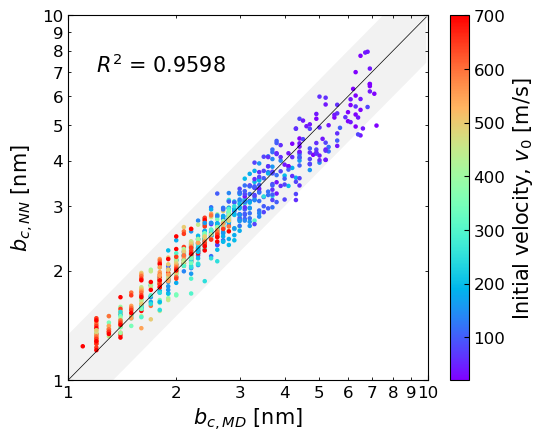

In [152]:
from matplotlib.ticker import FormatStrFormatter

x=np.arange(10,100)
fig, axs = plt.subplots(1,1,figsize=(6,5))
axNormal(axs)

axs.fill_between(x*0.1,x*0.1*0.75,x*0.1*1.333,color="gray",alpha=0.1,lw=0.01)
axs.fill_between(x,x*0.8,x*1.25,color="gray",alpha=0.15,lw=0.01)
axs.fill_between(x,x*0.5,x*2,color="gray",alpha=0.1,lw=0.01)
mainplt=axs.scatter(MD*0.1,NN*0.1,s=5,c=v,marker="o",cmap="rainbow")
axs.plot(x*0.1,x*0.1,linewidth=0.5,c="black")

axs.set_xlim([1,10])
axs.set_ylim([1,10])
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel(r"$\it b_{c,MD}$ [nm]", fontsize=15)
axs.set_ylabel(r"$\it b_{c,NN}$ [nm]", fontsize=15)
axs.text(1.2,7,r"$\it R^{2}$ = "+'{:.4f}'.format(R2), fontsize=15)
cb=fig.colorbar(mainplt)
cb.set_label(r'Initial velocity, $v_0$ [m/s]', size=15)
axs.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
plt.savefig("MDNN.png", dpi=1000)
plt.show()

## 3 Check coagulation rate coefficient, $\beta _{\rm{MD}}$ and $\beta _{\rm{NN}}$
### 3.1 Calculation

In [158]:
T=300
x=np.arange(1,10,0.01)
MD=np.zeros(0)
NN=np.zeros(0)
rcr=np.zeros(0)
f=open("beta-beta_"+str(int(T))+".dat","w")
for s in ["0.6nm","1nm","2nm"]:
    data=np.loadtxt("../MD_postProcessing/"+s+"_beta.dat")
    betaMD=data[np.where(data.T[3]==T)]
    for i in betaMD:
        ni=calculator.DtoN(i[0]*10)         # dp to N (1st cluster)
        nj=calculator.DtoN(i[1]*10)         # dp to N (2nd cluster)
        betaNN=calculator.calculateBetaNN(ni,nj,T)    # main calculation
        MD=np.append(MD,i[2])
        NN=np.append(NN,betaNN)
        rcr=np.append(rcr,(i[0]+i[1])*0.5)
        f.write(str(i[0]*10)+"\t"+str(i[1]*10)+"\t"+str(i[2])+"\t"+str(betaNN*1.2)+"\n")
f.close()
MD2=MD*MD
NN2=NN*NN
MDNN=MD*NN
N=np.size(MD)
X=N*np.sum(MD2)-(np.sum(MD))**2
Y=N*np.sum(NN2)-(np.sum(NN))**2
R2=(N*np.sum(MDNN)-np.sum(MD)*np.sum(NN))/(X**0.5*Y**0.5)
MSE=np.sum((MD-NN)**2)/N

### 3.2 Plot

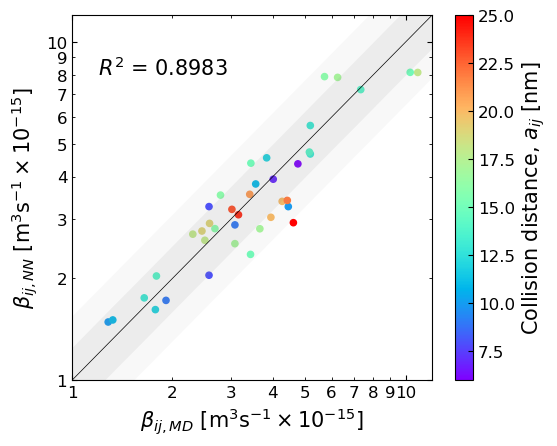

In [159]:
x=np.arange(1,12,0.01)
fig, axs = plt.subplots(1,1,figsize=(6,5))
axNormal(axs)

#axs.fill_between(x*0.1,x*0.1-1,x*0.1+1,color="gray",alpha=0.1,lw=0.01)
mainplt=axs.scatter(MD*1e15,NN*1.2e15,s=20,c=rcr*10,marker="o",cmap="rainbow")
axs.plot(x,x,linewidth=0.5,c="black")
axs.fill_between(x,x*0.8,x*1.25,color="gray",alpha=0.1,lw=0.01)
axs.fill_between(x,x*0.65,x*1.54,color="gray",alpha=0.05,lw=0.01)

axs.set_xlim([1,12])
axs.set_ylim([1,12])
axs.set_xlabel(r"$\beta _{ij,MD}$ $[\rm {m}^3 \rm{s}^{-1} \times 10^{-15}]$", fontsize=15)
axs.set_ylabel(r"$\beta _{ij,NN}$ $[\rm {m}^3 \rm{s}^{-1} \times 10^{-15}]$", fontsize=15)
axs.set_xscale("log")
axs.set_yscale("log")
#plt.ticklabel_format(style='sci', axis='y', useMathText=True)
#plt.ticklabel_format(style='sci', axis='x', useMathText=True)
axs.text(1.2,8,r"$\it R^{2}$ = "+'{:.4f}'.format(R2),fontsize=15)
cb=fig.colorbar(mainplt)
cb.set_label(r'Collision distance, $a_{ij}$ [nm]',size=15)
axs.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
plt.savefig("MDNN_beta_"+str(int(T))+".png", dpi=1000)
plt.show()

## 4 Check coagulation rate coefficient & enhancement factor maps over all size particles
### 4.1 Calculation

In [8]:
T=1200
dps=np.arange(5,30,1)
Ndp=np.size(dps)
betas=np.zeros((Ndp,Ndp))
etas=np.zeros((Ndp,Ndp))
for i in np.arange(Ndp):
    dpi=dps[i]
    for j in np.arange(i,Ndp):
        dpj=dps[j]
        ni=calculator.DtoN(dpi)         # dp to N (1st cluster)
        nj=calculator.DtoN(dpj)         # dp to N (2nd cluster)
        beta=calculator.calculateBetaNN(ni,nj,T)    # main calculation
        L=(dpi+dpj)*0.5
        v0=(8*8.314*T/calculator.mij/np.pi)**0.5
        eta=beta/(L*L*np.pi*v0)*1e20
        betas[i][j]=beta
        betas[j][i]=beta
        etas[i][j]=etas[j][i]=eta

### 4.2 Plot

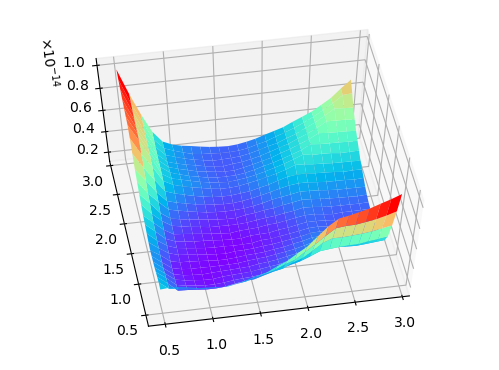

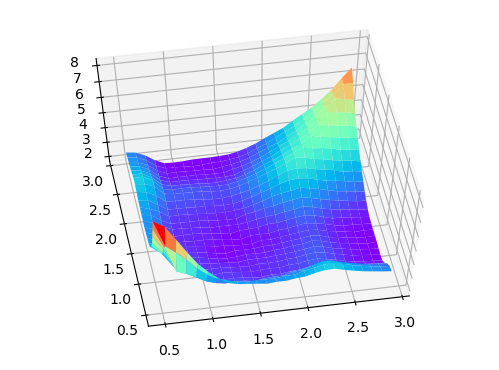

In [10]:
from mpl_toolkits import mplot3d
from matplotlib import ticker
niceMathTextForm = ticker.ScalarFormatter(useMathText=True)

fig = plt.figure()
axs = plt.axes(projection='3d')
axs.w_zaxis.set_major_formatter(niceMathTextForm)

X, Y = np.meshgrid(dps*0.1, dps*0.1)
#axs.contour3D(X, Y, betas, 50, cmap='binary')
axs.plot_surface(X, Y, betas, cmap='rainbow', edgecolor='none')
axs.view_init(60, -100)
plt.savefig("betaMap"+str(int(T))+".png", dpi=1000)
plt.show()

X, Y = np.meshgrid(dps*0.1, dps*0.1)
fig = plt.figure()
axs = plt.axes(projection='3d')
axs.w_zaxis.set_major_formatter(niceMathTextForm)
axs.plot_surface(X, Y, etas, cmap='rainbow', edgecolor='none')
axs.view_init(60, -100)
plt.savefig("enhanceMap"+str(int(T))+".png", dpi=1000)
plt.show()